# Reading Dataset

Combine all data in a single dataframe, which can be later used for further analysis

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# File path to excel file containing the dataset
file_path = 'PenaltyDatabase.xlsx'

# Initialize an empty list to hold all the dataframes
all_players_data = []
sheet_names=['Ronaldo', 'Messi', 'Lewandowski', 'Kane', 'Mbappe']

def clean_column_names(dataframe):
    clean_columns = {col: col.strip().replace(' ', '') for col in dataframe.columns}
    return dataframe.rename(columns=clean_columns)

# Iterate over each sheet name and read the sheet into a dataframe
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    #print(df.columns)
    # Add a column to identify the player
    df['Player'] = sheet_name
    df = clean_column_names(df)
    all_players_data.append(df)

# Concatenate all the dataframes into a single dataframe
combined_df = pd.concat(all_players_data, ignore_index=True)

In [2]:
# Identify columns containing the keyword 'Unnamed'
unnamed_cols = [col for col in combined_df.columns if 'Unnamed' in col]

# Drop these columns
combined_df = combined_df.drop(columns=unnamed_cols)

## Dataset 5 columns

In [3]:
combined_df.head()

,REF,Competition,Date,Hometeam,Awayteam,Teamtakingpen,Half,Placement,Scored,Goalkeeper,Goalkeeperposition,Player
0,1,Serie A,01.11.2020.,Spezia Calcio,Juventus FC,Away,Second Half,Middle,Yes,Ivan Provedel,Right,Ronaldo
1,2,2022 World Cup,24.11.2022.,Portugal,Ghana,Home,Second Half,Bottom Left,Yes,Lawrence Ati Zigi,Left,Ronaldo
2,3,Confederations Cup 2017,24.06.2017.,New Zealand,Portugal,Away,First Half,Top Right,Yes,Stefan Marinovic,Left,Ronaldo
3,4,Copa del Rey,11.02.2014.,Atlético de Madrid,Real Madrid,Away,First Half,Bottom Left,Yes,Daniel Aranzubia,Left,Ronaldo
4,5,Copa del Rey,26.02.2013.,FC Barcelona,Real Madrid,Away,First Half,Bottom Left,Yes,José Manuel Pinto,Right,Ronaldo


# Creation of Filters

In [4]:
def filter_by_competition(dataframe, competition=None):
    if competition:
        return dataframe[dataframe['Competition'] == competition]
    else:
        return dataframe

def filter_by_home_away(dataframe, home_away=None):
    if home_away:
        return dataframe[dataframe['Teamtakingpen'] == home_away]
    else:
        return dataframe

def filter_by_half(dataframe, half=None):
    if half:
        return dataframe[dataframe['Half'] == half]
    else:
        return dataframe

def filter_by_scored(dataframe, scored=None):
    if scored is not None:
        return dataframe[dataframe['Scored'] == scored]
    else:
        return dataframe

# Function to apply all filters at once
def apply_filters(dataframe, competition=None, home_away=None, half=None, scored=None):
    filtered_df = dataframe
    if competition:
        filtered_df = filter_by_competition(filtered_df, competition)
    if home_away:
        filtered_df = filter_by_home_away(filtered_df, home_away)
    if half:
        filtered_df = filter_by_half(filtered_df, half)
    if scored is not None:
        filtered_df = filter_by_scored(filtered_df, scored)
    return filtered_df

# Usage example:

## Example use of filters

In [5]:
# To see Messi penalties in all competitions, in the second half, playing away:
messi_df = combined_df[combined_df['Player'] == 'Messi']  # First, filter by player
filtered_messi_df = apply_filters(messi_df, half='Second Half', home_away='Away')

# Now filtered_messi_df will contain only the rows that match the specified conditions

In [6]:
filtered_messi_df

,REF,Competition,Date,Hometeam,Awayteam,Teamtakingpen,Half,Placement,Scored,Goalkeeper,Goalkeeperposition,Player
169,3,LaLiga,02.05.2021,Valencia CF,FC Barcelona,Away,Second Half,Bottom Left,No,Jasper Cillessen,Left,Messi
176,10,UEFA Champions League,28.10.2020,Juventus,FC Barcelona,Away,Second Half,Top Left,Yes,Wojciech Szczesny,Right,Messi
196,30,Copa del Rey,17.01.2018,RCD Espanyol,FC Barcelona,Away,Second Half,Bottom Right,No,Diego López,Right,Messi
197,31,LaLiga,23.12.2017,Real Madrid,FC Barcelona,Away,Second Half,Top Right,Yes,Keylor Navas,Right,Messi
210,44,UEFA Champions League,23.11.2016,Celtic FC,FC Barcelona,Away,Second Half,Middle,Yes,Craig Gordon,Right,Messi
211,45,LaLiga,22.10.2016,Valencia CF,FC Barcelona,Away,Second Half,Bottom Left,Yes,Diego Alves,Left,Messi
212,46,LaLiga,17.09.2016,CD Leganes,FC Barcelona,Away,Second Half,Top Right,Yes,Jon Ander Serantes,Right,Messi
215,49,LaLiga,06.03.2016,SD Eibar,FC Barcelona,Away,Second Half,Middle,Yes,\tAsier Riesgo,Right,Messi
216,50,UEFA Champions League,23.02.2016,Arsenal FC,FC Barcelona,Away,Second Half,Bottom Left,Yes,Petr Cech,Right,Messi
225,59,UEFA Champions League,24.02.2015,Manchester City,FC Barcelona,Away,Second Half,Bottom Right,No,Joe Hart,Right,Messi


# Shots on Goals

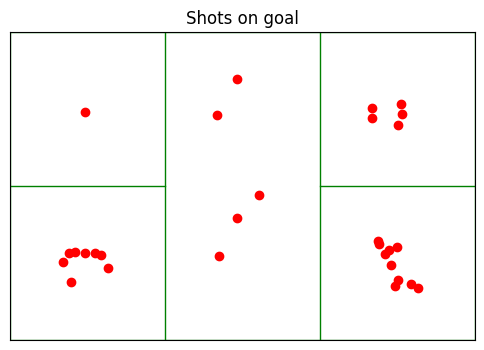

In [7]:
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to overlay shots on the goal visualization
def draw_shots_on_goal(dataframe):
    dataframe=dataframe[dataframe['Placement']!='Missed']
    # Define the figure and axis
    fig, ax = plt.subplots(figsize=(6, 4))

    # Create the goalpost outline
    goalpost = patches.Rectangle((0, 0), 1, 1, linewidth=1, edgecolor='green', facecolor='none')
    ax.add_patch(goalpost)

    # Draw vertical lines to divide into Left, Middle, Right
    ax.plot([1/3, 1/3], [0, 1], color='green', linestyle='-', linewidth=1)
    ax.plot([2/3, 2/3], [0, 1], color='green', linestyle='-', linewidth=1)

    # Draw horizontal lines for Top and Bottom, but not through the Middle
    ax.plot([0, 1/3], [1/2, 1/2], color='green', linestyle='-', linewidth=1)
    ax.plot([2/3, 1], [1/2, 1/2], color='green', linestyle='-', linewidth=1)

    # Assuming the 'Placement' column contains the sector names
    # Let's iterate through the dataframe and plot each shot
    for index, row in dataframe.iterrows():
        placement = row['Placement']

        # Define the center point of each sector
        sector_centers = {
            'Top Left': (1/6, 3/4),
            'Middle': (1/2, 1/2),  # Middle sector now spans the full height
            'Top Right': (5/6, 3/4),
            'Bottom Left': (1/6, 1/4),
            'Bottom Right': (5/6, 1/4)
        }

        # Generate a random point around the center for variability
        x, y = sector_centers[placement]
        x += random.uniform(-1/6, 1/6) / 3  # Adjust for randomness
        y += random.uniform(-1/2, 1/2) if placement == 'Middle' else random.uniform(-1/4, 1/4) / 3

        # Plot the shot
        ax.plot(x, y, 'ro')  # 'ro' means red circle

    # Remove axes
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    plt.title("Shots on goal")
    plt.show()


# Call the function to draw the shots on the goal
draw_shots_on_goal(filtered_messi_df)

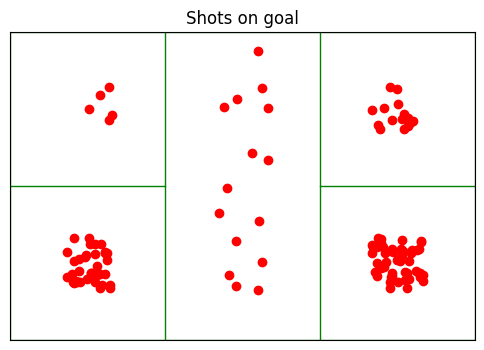

In [8]:
# Unfiltered shots
draw_shots_on_goal(messi_df) # 126 rows

# Heatmap on Goals

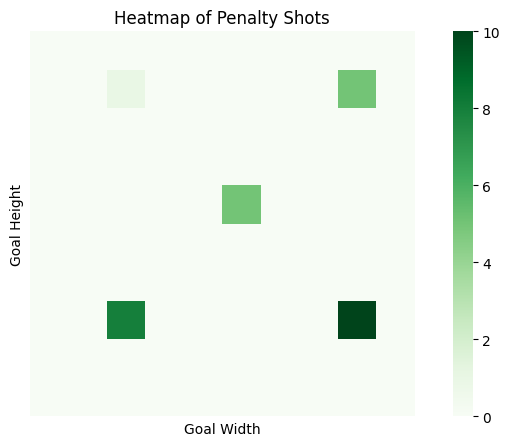

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to convert placement categories to numerical coordinates
def convert_placement_to_coordinates(placement):
    mapping = {
        'Top Left': (0.2, 0.8),
        'Top Right': (0.8, 0.8),
        'Middle': (0.5, 0.5),
        'Bottom Left': (0.2, 0.2),
        'Bottom Right': (0.8, 0.2)
    }
    return mapping.get(placement, (0.5, 0.5))  # Default to 'Middle' if placement is unknown

# Function to create a heatmap of penalty shots
def create_penalty_heatmap(dataframe):
    # Convert the 'Placement' column to numerical coordinates
    dataframe=dataframe[dataframe['Placement']!='Missed']
    coords = dataframe['Placement'].apply(convert_placement_to_coordinates)

    # Prepare the grid
    grid_size = 10  # This determines the resolution of the heatmap
    penalty_grid = np.zeros((grid_size, grid_size))

    # Populate the grid
    for coord in coords:
        x, y = coord
        x_idx = int(x * grid_size)
        y_idx = int(y * grid_size)
        penalty_grid[y_idx, x_idx] += 1  # Increment the count for the shot's position

    # Create the heatmap

    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title("Heatmap of Penalty Shots")
    sns.heatmap(penalty_grid, cmap='Greens', ax=ax)
    ax.set_aspect('equal')
    plt.xlabel("Goal Width")
    plt.ylabel("Goal Height")
    plt.xticks([])
    plt.yticks([])
    ax.invert_yaxis()  # Invert the y-axis so the top of the plot is the goal's top

    plt.show()



# Create the heatmap for the example data
create_penalty_heatmap(filtered_messi_df)

# Goalkeeper Position

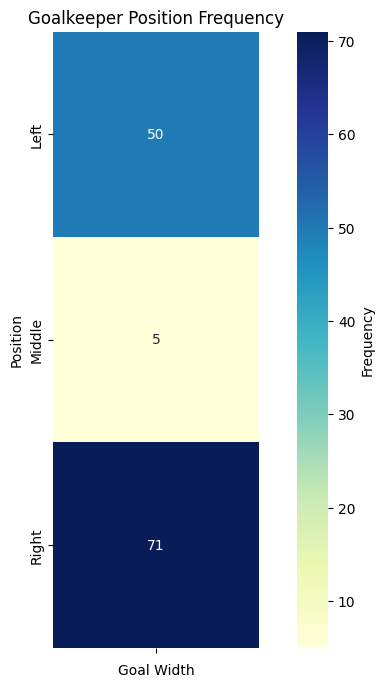

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def draw_goalkeeper_heatmap(dataframe, position_column):
    # Create a frequency table for goalkeeper positions
    goalkeeper_position_counts = dataframe[position_column].value_counts().reindex(['Left', 'Middle', 'Right'], fill_value=0)

    # Create a DataFrame from the frequency table
    heatmap_data = pd.DataFrame({
        'Position': ['Left', 'Middle', 'Right'],
        'Frequency': [goalkeeper_position_counts['Left'], goalkeeper_position_counts['Middle'], goalkeeper_position_counts['Right']]
    }).set_index('Position')

    # Draw the heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", cbar_kws={'label': 'Frequency'})

    # Set the aspect of the plot to match the proportions of a football goal
    ax.set_aspect('equal')
    ax.set_xticklabels([])
    ax.set_xlabel('Goal Width')
    ax.set_ylabel('Position')

    plt.title('Goalkeeper Position Frequency')
    plt.show()

draw_goalkeeper_heatmap(messi_df, 'Goalkeeperposition')


# Test on Ronaldo

In [11]:
# To see Ronaldo penalties in all competitions, in the second half, while playing away:
Ronaldo_df = combined_df[combined_df['Player'] == 'Ronaldo']  # First, filter by player
filtered_Ronaldo_df = apply_filters(Ronaldo_df, home_away='Away', half='Second Half')

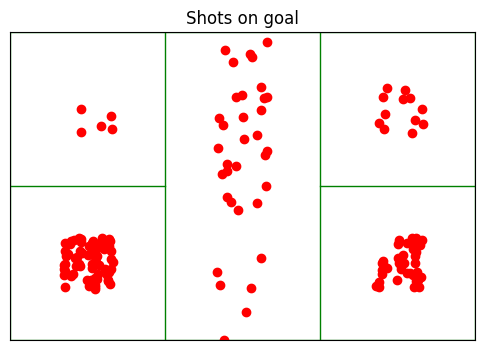

In [12]:
draw_shots_on_goal(Ronaldo_df)

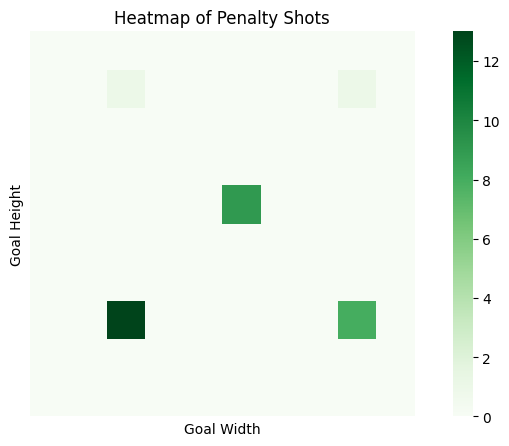

In [13]:
create_penalty_heatmap(filtered_Ronaldo_df)

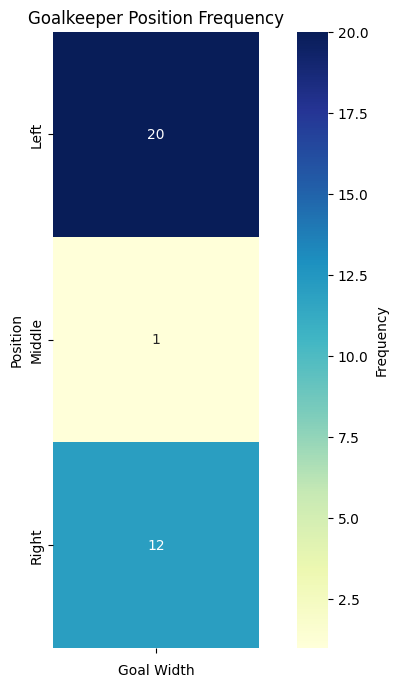

In [14]:
draw_goalkeeper_heatmap(filtered_Ronaldo_df, 'Goalkeeperposition')

## Placement probability visualization

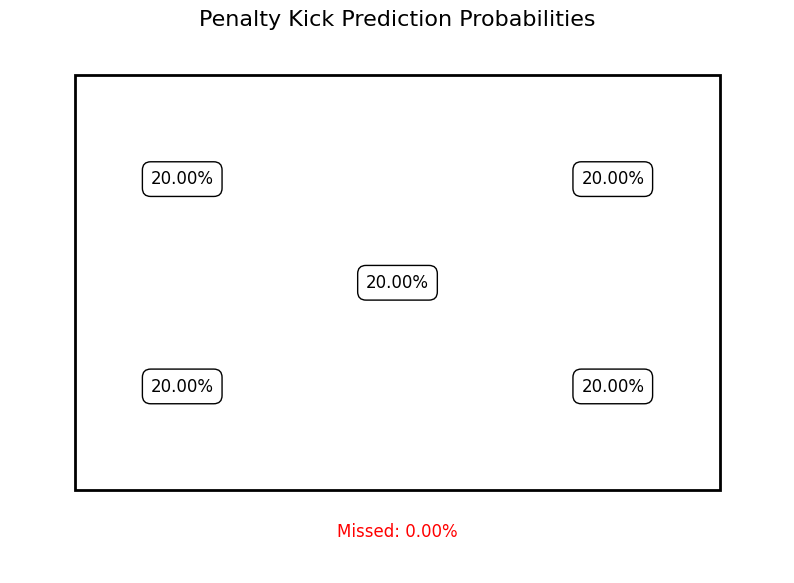

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def draw_goal_with_probabilities(probabilities):
    # Define the figure and axis
    fig, ax = plt.subplots(figsize=(10, 7))

    # Create the goalpost outline
    goalpost = patches.Rectangle((0, 0), 1, 1, linewidth=2, edgecolor='black', facecolor='none')
    ax.add_patch(goalpost)

    # Define the center point and size of each sector
    sector_info = {
        'Bottom Left': {'center': (1/6, 1/4), 'text': probabilities.get('bottom left', 0)},
        'Bottom Right': {'center': (5/6, 1/4), 'text': probabilities.get('bottom right', 0)},
        'Middle': {'center': (1/2, 1/2), 'text': probabilities.get('middle', 0)},
        'Top Left': {'center': (1/6, 3/4), 'text': probabilities.get('top left', 0)},
        'Top Right': {'center': (5/6, 3/4), 'text': probabilities.get('top right', 0)}
    }

    # Draw sectors and annotate with probabilities
    for sector, info in sector_info.items():
        ax.text(*info['center'], f"{info['text']:.2%}", ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

    # Add "Missed" label outside the goalpost
    ax.text(0.5, -0.1, f"Missed: {probabilities.get('missed', 0):.2%}", ha='center', va='center', fontsize=12, color='red')

    # Setting up the plot limits and labels
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.2, 1.1)
    ax.axis('off')  # Hide axis

    plt.title("Penalty Kick Prediction Probabilities", fontsize=16)
    plt.show()

# Example visualization to be later used for prediction evaluation
draw_goal_with_probabilities({'bottom left':0.2, 'bottom right':0.2, 'middle':0.2, 'top left':0.2, 'top right':0.2})

## Goalkeeper position probability visualization

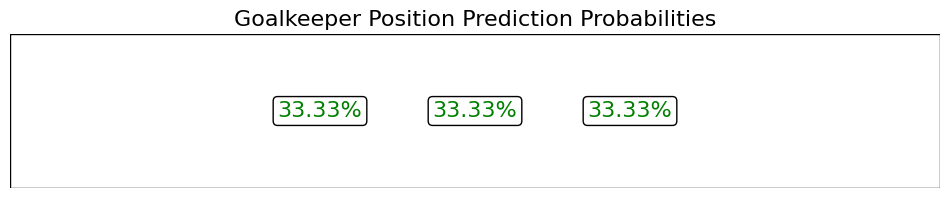

In [16]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
def draw_goalkeeper_probabilities(probabilities):
    # Define the figure and axis
    fig, ax = plt.subplots(figsize=(12, 2))  # More elongated figure to represent the goal width

    # Create the goalpost outline
    goal_area = patches.Rectangle((0, 0), 1, 0.2, linewidth=1, edgecolor='black', facecolor='none')
    ax.add_patch(goal_area)

    # Define the center point and size of each position
    position_info = {
        'Left': {'center': (1/3, 0.1), 'text': probabilities.get('left', 0)},
        'Middle': {'center': (0.5, 0.1), 'text': probabilities.get('middle', 0)},
        'Right': {'center': (2/3, 0.1), 'text': probabilities.get('right', 0)}
    }

    # Draw positions and annotate with probabilities
    for position, info in position_info.items():
        probability_text = f"{info['text']:.2%}"
        color = 'green' if info['text'] > 0 else 'red'
        ax.text(*info['center'], probability_text, ha='center', va='center', fontsize=16, color=color,
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))

    # Adjusting the plot limits and labels to reduce the gap
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.2)  # Reduced y-limit to match the height of the goal_area
    ax.axis('off')  # Hide axis

    plt.title("Goalkeeper Position Prediction Probabilities", fontsize=16)
    plt.show()

# Example visualization to be later used for prediction evaluation
draw_goalkeeper_probabilities({'left':0.3333333, 'middle': 0.3333333, 'right':0.3333333})

# Machine Learning Section

Encode necessary training data from the previous dataset as numeric values (category numbers)

In [17]:
combined_df['cGoalkeeperposition'] = combined_df['Goalkeeperposition'].astype('category').cat.rename_categories({'Left': 0, 'Middle': 1, 'Right': 2})
combined_df['cTeamtakingpen'] = combined_df['Teamtakingpen'].astype('category').cat.rename_categories({'Away': 0, 'Home': 1})
combined_df['cPlayer'] = combined_df['Player'].astype('category').cat.rename_categories({'Ronaldo': 0, 'Messi': 1, 'Lewandowski': 2, 'Kane': 3, 'Mbappe': 4})
combined_df['cHalf'] = combined_df['Half'].astype('category').cat.rename_categories({'First Half': 0, 'Second Half': 1, 'Extra Time': 2})
combined_df['cScored'] = combined_df['Scored'].astype('category').cat.rename_categories({'No': 0, 'Yes': 1})
combined_df['cPlacement'] = combined_df['Placement'].astype('category').cat.rename_categories({'Top Left': 0, 'Top Right': 1, 'Middle': 2, 'Bottom Left': 3, 'Bottom Right': 4, 'Missed': 5})
combined_df

,REF,Competition,Date,Hometeam,Awayteam,Teamtakingpen,Half,Placement,Scored,Goalkeeper,Goalkeeperposition,Player,cGoalkeeperposition,cTeamtakingpen,cPlayer,cHalf,cScored,cPlacement
0,1,Serie A,01.11.2020.,Spezia Calcio,Juventus FC,Away,Second Half,Middle,Yes,Ivan Provedel,Right,Ronaldo,2,0,0,1,1,2
1,2,2022 World Cup,24.11.2022.,Portugal,Ghana,Home,Second Half,Bottom Left,Yes,Lawrence Ati Zigi,Left,Ronaldo,0,1,0,1,1,3
2,3,Confederations Cup 2017,24.06.2017.,New Zealand,Portugal,Away,First Half,Top Right,Yes,Stefan Marinovic,Left,Ronaldo,0,0,0,0,1,1
3,4,Copa del Rey,11.02.2014.,Atlético de Madrid,Real Madrid,Away,First Half,Bottom Left,Yes,Daniel Aranzubia,Left,Ronaldo,0,0,0,0,1,3
4,5,Copa del Rey,26.02.2013.,FC Barcelona,Real Madrid,Away,First Half,Bottom Left,Yes,José Manuel Pinto,Right,Ronaldo,2,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,34,Coupe de France,03.04.2019,Paris Saint-Germain,Fc Nantes,Home,Second Half,Bottom Right,No,Ciprian Tătărușanu,Right,Mbappe,2,1,4,1,0,4
468,35,Ligue 1,17.03.2019,Paris Saint-Germain,Olympique Marseille,Home,Second Half,Bottom Right,No,Yohann Pelé,Right,Mbappe,2,1,4,1,0,4
469,36,Ligue 1,02.03.2019,SM Caen,Paris Saint-Germain,Away,Second Half,Bottom Right,Yes,Brice Samba,Left,Mbappe,0,0,4,1,1,4
470,37,Coupe de France,06.01.2019,GSI Pontivy,Paris Saint-Germain,Away,Second Half,Bottom Right,Yes,Clément Daoudou,Left,Mbappe,0,0,4,1,1,4


Set up test data (10 records taken from each player)

In [18]:
# File path containing excel file of our testing data
file_path = 'TestingDatabase.xlsx'

# Initialize an empty list to hold all the dataframes
testing_data = []
sheet_names=['Ronaldo', 'Messi', 'Lewandowski', 'Kane', 'Mbappe']

def clean_column_names(dataframe):
    clean_columns = {col: col.strip().replace(' ', '') for col in dataframe.columns}
    return dataframe.rename(columns=clean_columns)

# Iterate over each sheet name and read the sheet into a dataframe
for sheet_name in sheet_names:
    df = pd.read_excel(file_path,index_col=0, sheet_name=sheet_name)
    df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)
    df = clean_column_names(df)
    # Add a column to identify the player
    df['Player'] = sheet_name
    testing_data.append(df)

# Concatenate all the dataframes into a single dataframe
testing_df = pd.concat(testing_data, ignore_index=True)

# Convert data into numeric values
testing_df['cGoalkeeperposition'] = testing_df['Goalkeeperposition'].astype('category').cat.rename_categories({'Left': 0, 'Middle': 1, 'Right': 2})
testing_df['cTeamtakingpen'] = testing_df['Teamtakingpen'].astype('category').cat.rename_categories({'Away': 0, 'Home': 1})
testing_df['cPlayer'] = testing_df['Player'].astype('category').cat.rename_categories({'Ronaldo': 0, 'Messi': 1, 'Lewandowski': 2, 'Kane': 3, 'Mbappe': 4})
testing_df['cHalf'] = testing_df['Half'].astype('category').cat.rename_categories({'First Half': 0, 'Second Half': 1, 'Extra Time': 2})
testing_df['cScored'] = testing_df['Scored'].astype('category').cat.rename_categories({'No': 0, 'Yes': 1})
testing_df['cPlacement'] = testing_df['Placement'].astype('category').cat.rename_categories({'Top Left': 0, 'Top Right': 1, 'Middle': 2, 'Bottom Left': 3, 'Bottom Right': 4, 'Missed': 5})

# Inspect class distribution
testing_df['cPlacement'].value_counts()

cPlacement
4    20
3    14
2     7
0     5
1     3
5     1
Name: count, dtype: int64

# Model for placement predictions

Split predictors and target for both training and test data

In [19]:
predictors = ['cPlayer', 'cHalf', 'cScored', 'cTeamtakingpen', 'cGoalkeeperposition']
target = 'cPlacement'
X = combined_df[predictors]
y = combined_df[target]
X_test = testing_df[predictors]
y_test = testing_df[target]

Fit training data to model

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=900, min_samples_split=2, random_state=42)
rf_classifier.fit(X, y)

RandomForestClassifier(n_estimators=900, random_state=42)

In [21]:
from sklearn.model_selection import cross_val_score

# Evaluate model accuracy across 10 folds
cv_scores = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.33333333 0.25       0.36170213 0.44680851 0.40425532 0.31914894
 0.44680851 0.46808511 0.08510638 0.31914894]
Mean CV Score: 0.3434397163120567


Test results function for comparing model predictions to the full set of handpicked test samples.

In [22]:
from sklearn.metrics import classification_report

# Test our model against the testing dataset, generate a classification report and a confusion matrix
def test_results():
  y_pred = rf_classifier.predict(X_test)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  combined = pd.DataFrame(dict(actual=y_test, prediction=y_pred))
  print(pd.crosstab(index=combined["actual"], columns=combined["prediction"]))


## Test results on placement predictions

22/50 correct predictions

In [23]:
test_results()

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.00      0.00      0.00         3
           2       0.50      0.14      0.22         7
           3       0.41      0.79      0.54        14
           4       0.53      0.45      0.49        20
           5       0.00      0.00      0.00         1

    accuracy                           0.44        50
   macro avg       0.32      0.26      0.26        50
weighted avg       0.45      0.44      0.40        50

prediction  0  1  2   3  4
actual                    
3           1  1  0  11  1
4           0  1  1   9  9
2           0  0  1   3  3
5           0  0  0   1  0
0           1  0  0   2  2
1           0  0  0   1  2


# Model for goalkeeper position predictions

Split predictors and target for both training and test data

In [24]:
predictors = ['cPlayer', 'cHalf', 'cScored', 'cTeamtakingpen']
target = 'cGoalkeeperposition'
X = combined_df[predictors]
y = combined_df[target]
X_test = testing_df[predictors]
y_test = testing_df[target]

Fit training data to model

In [25]:
from sklearn.ensemble import RandomForestClassifier

goalkeeper_rf_classifier = RandomForestClassifier(n_estimators=100, class_weight=None, min_samples_split=2, random_state=42)
goalkeeper_rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [26]:
from sklearn.model_selection import cross_val_score

# Evaluate model accuracy across 10 folds
cv_scores = cross_val_score(goalkeeper_rf_classifier, X, y, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.52083333 0.5        0.57446809 0.61702128 0.5106383  0.44680851
 0.5106383  0.5106383  0.53191489 0.55319149]
Mean CV Score: 0.5276152482269503


Test results function for comparing model predictions to the full set of handpicked test samples.

In [27]:
from sklearn.metrics import classification_report

# Test our model against the testing dataset, generate a classification report and a confusion matrix
def goalkeeper_test_results():
  y_pred = goalkeeper_rf_classifier.predict(X_test)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))
  combined = pd.DataFrame(dict(actual=y_test, prediction=y_pred))
  print(pd.crosstab(index=combined["actual"], columns=combined["prediction"]))

## Goalkeeper position prediction results

26/50 correct predictions

In [28]:
goalkeeper_test_results()

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.68      0.58        22
           1       0.00      0.00      0.00         5
           2       0.55      0.48      0.51        23

    accuracy                           0.52        50
   macro avg       0.35      0.39      0.36        50
weighted avg       0.47      0.52      0.49        50

prediction   0   2
actual            
0           15   7
1            3   2
2           12  11


# Prediction functions for probability visualizations and manual verification

### Placement prediction function
Parameters: player, half, scored, team taking pen, goalkeeper position (string values)

In [29]:
def make_prediction_placement(player, half, scored, teamtakingpen, gkposition):

  # Convert string input to the same category values as they are in our dataset
  params = {
    'ronaldo': 0, 'messi': 1,'lewandowski': 2, 'kane': 3, 'mbappe': 4,          #player
    'first half': 0, 'second half': 1, 'extra time': 3,                         #half
    'no': 0, 'yes': 1,                                                          #scored
    'left': 0, 'middle': 1, 'right': 2,                                         #goalkeeper position
    'away': 0,'home': 1                                                         #team taking pen
  }

  placements = {'top left': 0,'top right': 1,'middle': 2,'bottom left': 3,'bottom right': 4,'missed': 5}

  # Convert all input to lowercase
  player = params[player.lower()]
  half = params[half.lower()]
  scored = params[scored.lower()]
  teamtakingpen = params[teamtakingpen.lower()]
  gkposition = params[gkposition.lower()]

  # Call model's predict function with our input data
  data=[[player, half, scored, teamtakingpen, gkposition]]
  prediction = rf_classifier.predict_proba(data)

  probs = {}

  # Get probabilities for each category
  for placement_name, category_number in placements.items():
    score = prediction[0][category_number]
    probs[placement_name] = score

  draw_goal_with_probabilities(probs)

  return probs

### Goalkeeper position prediction function
Parameters: player, half scored, team taking pen (string values)

In [30]:
def make_prediction_goalkeeper(player, half, scored, teamtakingpen):

  # Convert string input to the same category values as they are in our dataset
  params = {
    'ronaldo': 0, 'messi': 1, 'lewandowski': 2, 'kane': 3, 'mbappe': 4,         #player
    'first half': 0,'second half': 1,'extra time': 3,                           #half
    'no': 0,'yes': 1,                                                           #scored
    'away': 0,'home': 1                                                         #team taking pen
  }

  positions = {'left': 0,'middle': 1,'right': 2}

  # Convert all input to lowercase
  player = params[player.lower()]
  half = params[half.lower()]
  scored = params[scored.lower()]
  teamtakingpen = params[teamtakingpen.lower()]

   # Call model's predict function with our input data
  data=[[player, half, scored, teamtakingpen]]
  prediction = goalkeeper_rf_classifier.predict_proba(data)

  probs = {}

  # Get probabilities for each category
  for position_name, category_number in positions.items():
    score = prediction[0][category_number]
    probs[position_name] = score

  draw_goalkeeper_probabilities(probs)

  return probs

## Prediction demo (manually inspecting some of the 50 test samples)

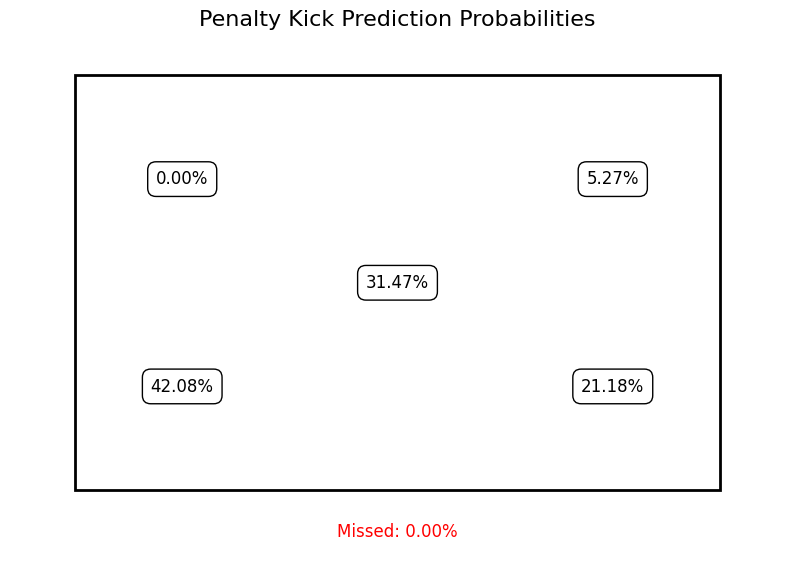

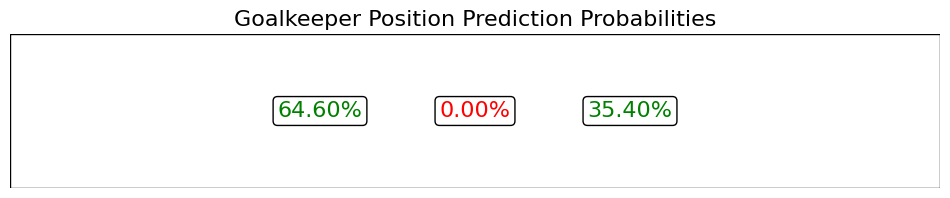

{'left': 0.6459939089390158, 'middle': 0.0, 'right': 0.35400609106098435}

In [31]:
"""
          USAGE:
          make_prediction_placement(player, half, scored, teamtakingpen, gkposition)  - PLACEMENT
          make_prediction_goalkeeper(player, half, scored, teamtakingpen)             - GOALKEEPER POS
"""

# make_prediction_placement('mbappe', 'second half', 'yes', 'away', 'right')    # Correct.
# make_prediction_goalkeeper('mbappe', 'second half', 'yes', 'away')            # Correct.
# make_prediction_placement('mbappe', 'first half', 'no', 'away', 'right')      # Correct.
# make_prediction_goalkeeper('mbappe', 'first half', 'no', 'away')              # Incorrect. Expected - right (17.71%)
# make_prediction_placement('mbappe', 'second half', 'yes', 'away', 'left')     # Incorrect. Expected - bottom left (2.27%)
# make_prediction_goalkeeper('mbappe', 'second half', 'yes', 'away')            # Incorrect. Expected - left (47.86%)


# make_prediction_placement('ronaldo', 'second half', 'yes', 'home', 'left')    # Correct.
# make_prediction_goalkeeper('ronaldo', 'second half', 'yes', 'home')           # Correct.
# make_prediction_placement('ronaldo', 'first half', 'yes', 'home', 'left')


# make_prediction_placement('messi', 'first half', 'no', 'away', 'right')       # Correct.
# make_prediction_goalkeeper('messi', 'first half', 'no', 'away')               # Incorrect. Expected - right (26.47%)
# make_prediction_placement('messi', 'first half', 'yes', 'home', 'right')      # Incorrect. Expected - top right (10.41%)
# make_prediction_goalkeeper('messi', 'first half', 'yes', 'home')              # Correct.
# make_prediction_placement('messi', 'second half', 'yes', 'away', 'middle')

make_prediction_placement('ronaldo', 'first half', 'yes', 'away', 'left')     # Incorrect. Expected - middle (31.47%)
make_prediction_goalkeeper('ronaldo', 'first half', 'yes', 'away')            # Correct